# Derivation of numerical data


.. codeauthor:: Emile Roux emile.roux@univ-smb.fr

.. This notebook is ready for  [RISE](https://damianavila.github.io/RISE/) Slideshow

## Scope

* Finite number $N$ of data points $(x,y)$ are available, its discribe a function $f(x)$: compute the derivative $\dfrac{df}{dx}$


https://en.wikipedia.org/wiki/Numerical_differentiation

In [1]:
#setup
%load_ext autoreload
%matplotlib nbagg
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


## Create synthetic data
For this notebook we use data comming from a known function. In this way we can check the accuracy of the results.

 - First function

In [2]:
# The function
def f(x):
    return (x**2-3*x+2*np.sin(5*x))

# The derivative
def df(x):
    return 2*x - 3 + 10 * np.cos(5*x)

 - Seconde function

In [3]:
# The function
def f(x):
    return (x**2)

# The derivative
def df(x):
    return 2*x 

Plotting the function and its dericative:

In [4]:
N = 400
xmin, xmax = 0., 4
x = np.linspace(xmin, xmax, N)

<IPython.core.display.Javascript object>


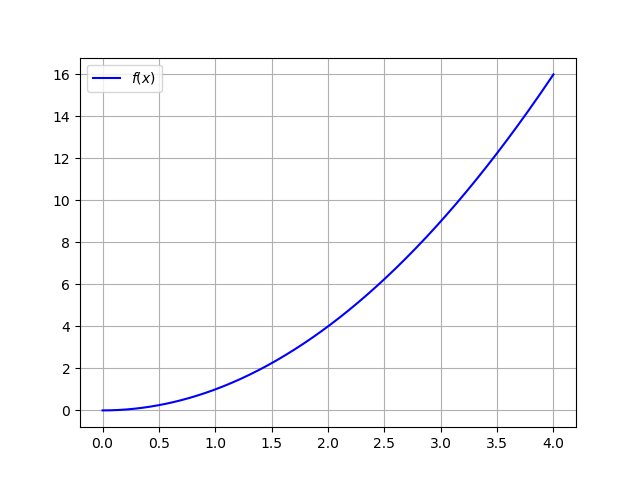

In [5]:
fig = plt.figure()
plt.plot(x,f(x),'b',label = "$f(x)$")
plt.legend()
plt.grid()

<IPython.core.display.Javascript object>


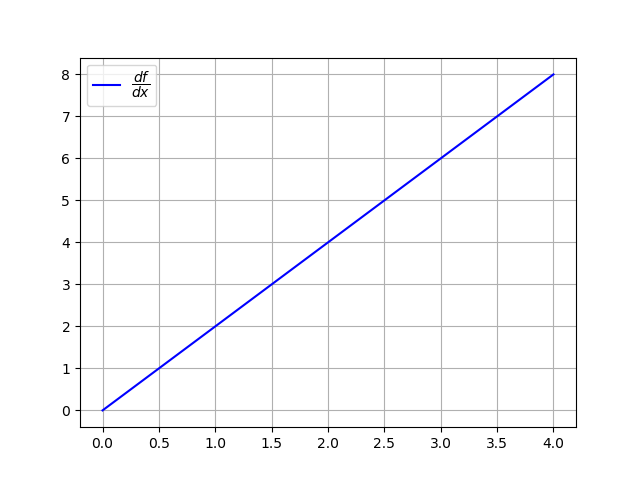

In [6]:
fig = plt.figure()
plt.plot(x,df(x),'b',label = "$\dfrac{df}{dx}$")
plt.legend()
plt.grid()

### Now we assume that only 40 points of this function are known:

In [7]:
N = 40
xmin, xmax = 0., 4
xi = np.linspace(xmin, xmax, N)
fi = f(xi)

<IPython.core.display.Javascript object>


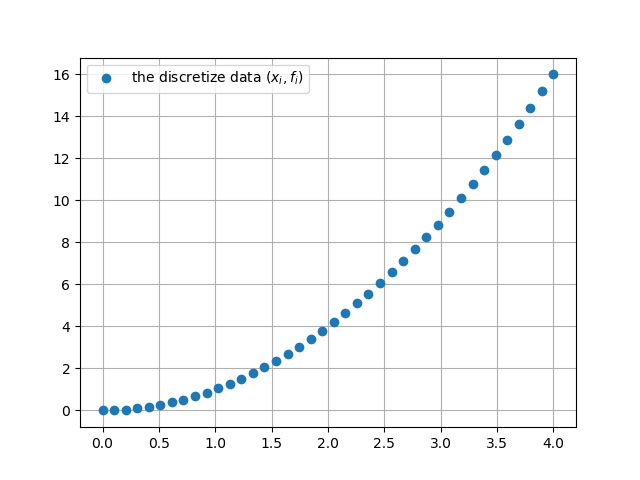

In [8]:
fig = plt.figure()
plt.plot(xi,fi,'o',label = "the discretize data $(x_i,f_i)$")
plt.legend()
plt.grid()

## The one point finite difference formula

$\dfrac{df}{dx} = \dfrac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}$ 

The numpy diff() function is a fast way to compute this formula:

In [9]:
df_1p = np.diff(fi)/np.diff(xi)

But becarefull the size of the resulting array n-1.

<IPython.core.display.Javascript object>


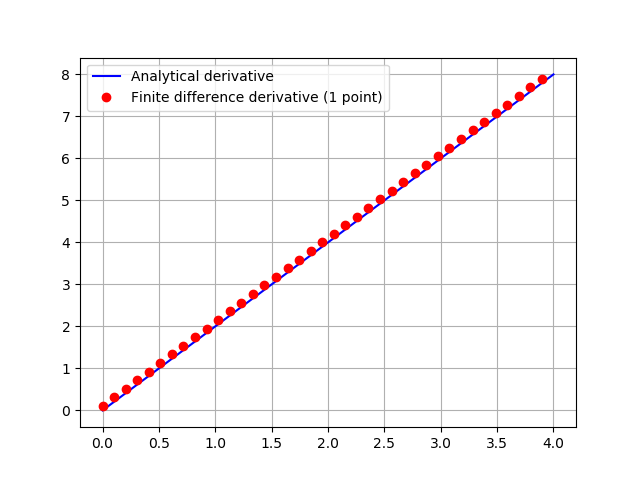

In [10]:
fig = plt.figure()
plt.plot(x,df(x),'b',label = "Analytical derivative")
plt.plot(xi[:-1],df_1p,'ro',label = "Finite difference derivative (1 point)")
plt.legend()
plt.grid()

## The 2 points finite difference formula

$\dfrac{df}{dx} = \dfrac{f(x_{i+1})-f(x_{i-1})}{x_{i+1}-x_{i-1}}$ 

Slicing method of numpy array is a good way to do such operation

In [11]:
# Slicing exemple
a=np.linspace(0,6,7)
print(a[2:])
print(a[:-2])

[ 2.  3.  4.  5.  6.]
[ 0.  1.  2.  3.  4.]


With slicing methode of numpy array the 2 points formula can be fast computed:

In [12]:
df_2p = (fi[2:] - fi[:-2])/(xi[2:] - xi[:-2])

<IPython.core.display.Javascript object>


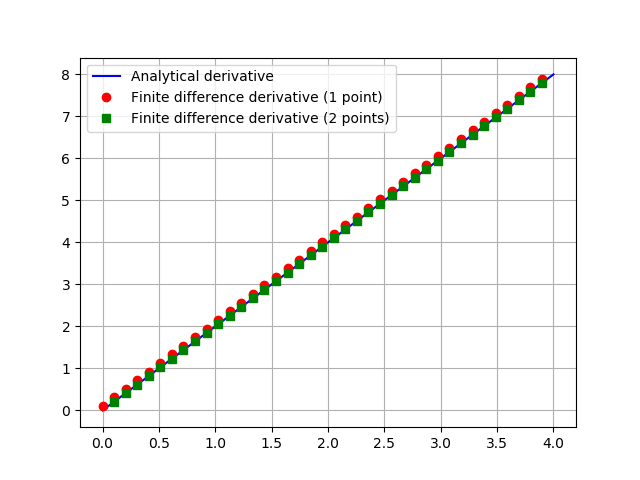

In [13]:
fig = plt.figure()
plt.plot(x,df(x),'b',label = "Analytical derivative")
plt.plot(xi[:-1],df_1p,'ro',label = "Finite difference derivative (1 point)")
plt.plot(xi[1:-1],df_2p,'gs',label = "Finite difference derivative (2 points)")
plt.legend()
plt.grid()

## Let's have a look at the error on the derivative computation

<IPython.core.display.Javascript object>


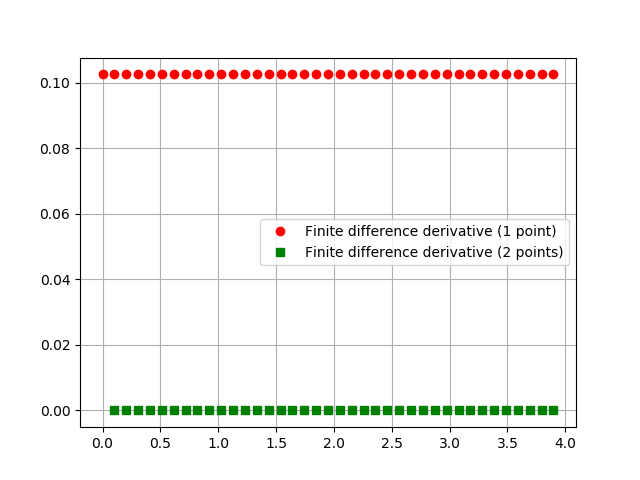

In [14]:
fig = plt.figure()
plt.plot(xi[:-1],(df_1p-df(xi[:-1])),'ro',label = "Finite difference derivative (1 point)")
plt.plot(xi[1:-1],(df_2p-df(xi[1:-1])),'gs',label = "Finite difference derivative (2 points)")
plt.legend()
plt.grid()

## What append if the data are noisy ?

In [15]:
fi_noise = f(xi) + 0.2*np.random.randn(fi.size)

<IPython.core.display.Javascript object>


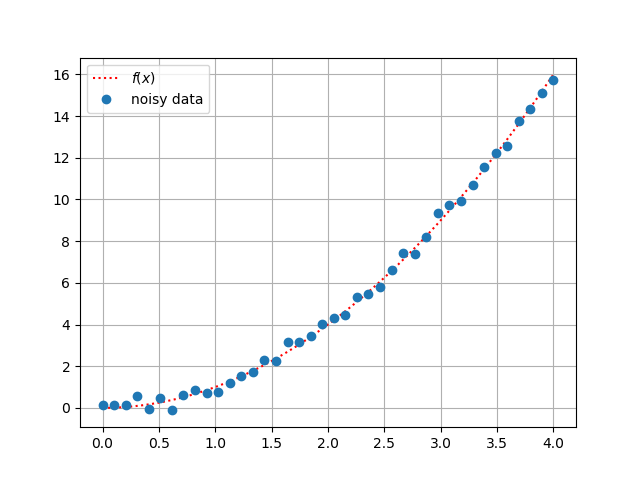

In [16]:
fig = plt.figure()
plt.plot(x,f(x),':r',label = "$f(x)$")
plt.plot(xi,fi_noise,'o',label = "noisy data")
plt.legend()
plt.grid()

### The 2 points fomrula is the more accurate. Let's use it to derivate the noisy data:

In [17]:
df_2p_n = (fi_noise[2:] - fi_noise[:-2])/(xi[2:] - xi[:-2])

<IPython.core.display.Javascript object>


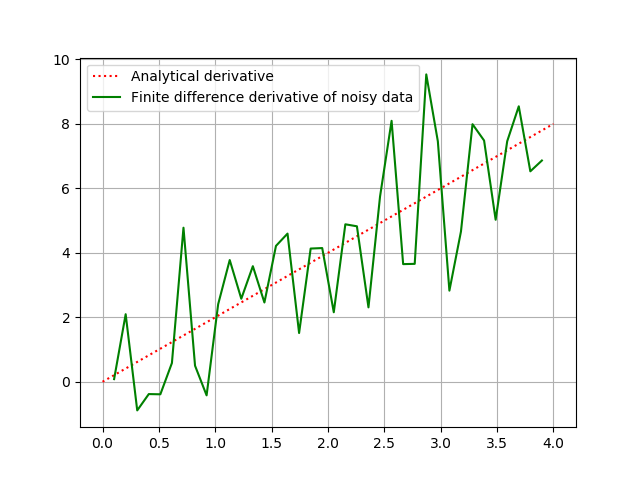

In [18]:
fig = plt.figure()
plt.plot(x,df(x),':r',label = "Analytical derivative")
plt.plot(xi[1:-1],df_2p_n,'-g',label = "Finite difference derivative of noisy data")
plt.legend()
plt.grid()

The obtaine results is not good for further use. Other methodes should be used to evaluat derivative of noisy data.